<a href="https://colab.research.google.com/github/liamconnor/final_project_ast100/blob/main/Ast100_Lecture8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astropy --upgrade
!pip install photutils

import numpy as np
import math
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import glob
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00


First let's make sure we have the relevant data. Go to the following shared Google drive:

https://drive.google.com/drive/u/1/folders/1lXT5kBVT6UnV10qUq1V4fRnoA87r0y3q

Click on **Ast100_Data -> Organize -> Add Shortcut** and mount this folder on "**MyDrive**". Then you can access via your own Google Drive account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/Ast100_Data/

bias/  Final_Projects_2025/  flat/  science_M90/  spectra/  SPRING2024_FAST@


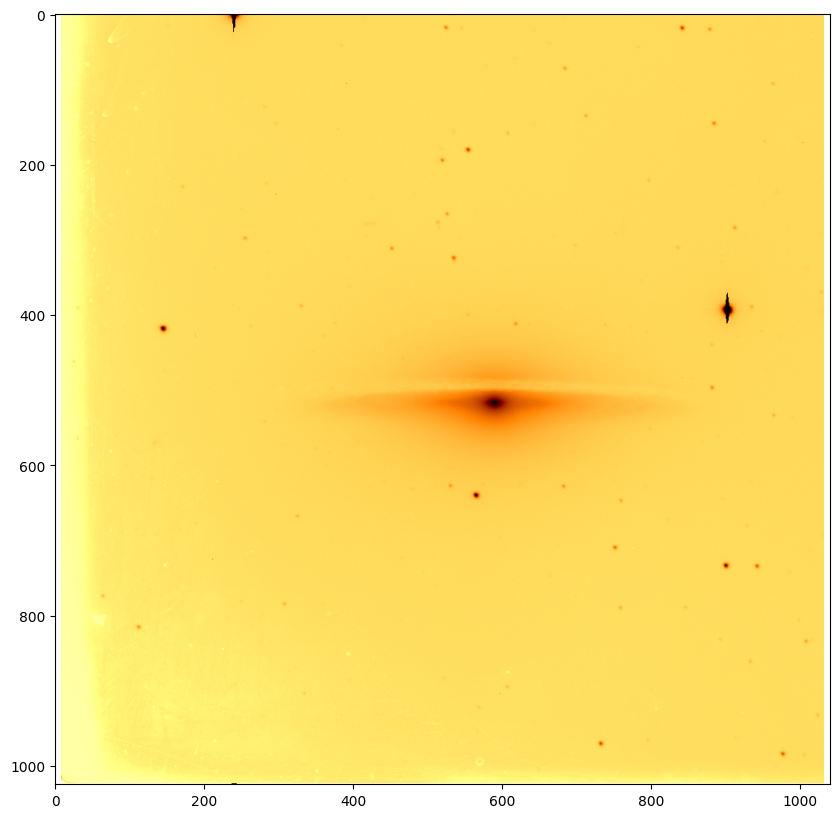

In [ ]:
fl = glob.glob('drive/MyDrive/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/*M104*.fits')
data = fits.getdata(fl[0], 2)

plt.figure(figsize=(10,10))
plt.imshow(np.arcsinh(data, ), aspect='auto',
           cmap='afmhot_r', )

Reading in the bias frames now
Created the master bias
Reading in the flat frames now


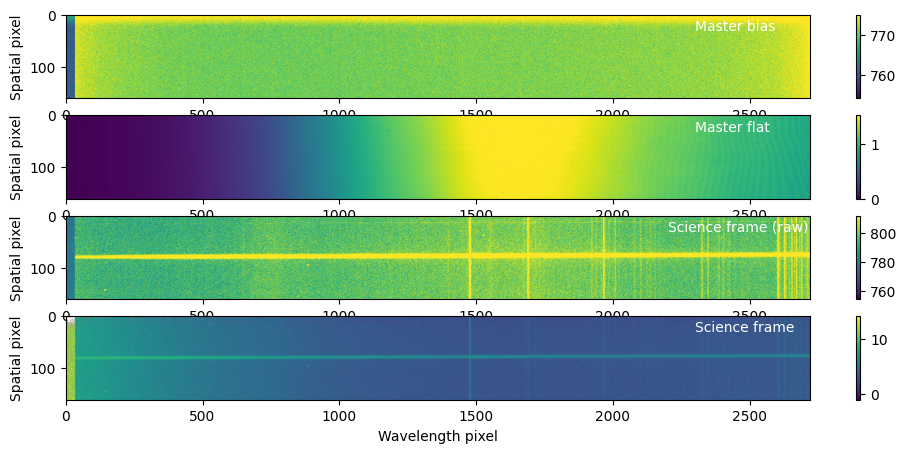

In [ ]:
fl = glob.glob('drive/MyDrive/Ast100_Data/spectra/*BIAS*.fits')

master_bias = []

print("Reading in the bias frames now")
for fn in fl:
  data = fits.getdata(fn)
  master_bias.append(data[None])

master_bias = np.concatenate(master_bias, axis=0)
master_bias = np.median(master_bias, axis=0)
print("Created the master bias")

fl = glob.glob('drive/MyDrive/Ast100_Data/spectra/*FLAT*.fits')

master_flat = []

print("Reading in the flat frames now")

for fn in fl:
  data = fits.getdata(fn)
  data = data - master_bias
  master_flat.append(data[None])

master_flat = np.concatenate(master_flat, axis=0)
master_flat = np.median(master_flat, axis=0)
master_flat = master_flat / np.median(master_flat)

fig = plt.figure(figsize=(12,5))

plt.subplot(411)
plt.imshow(master_bias, aspect='auto', vmax=np.percentile(master_bias, 90))
plt.colorbar()
plt.text(2300, 30, 'Master bias', color='white')
plt.ylabel('Spatial pixel')

plt.subplot(412)
plt.imshow(master_flat, aspect='auto', vmax=np.percentile(master_flat, 90))
plt.colorbar()
plt.text(2300, 30, 'Master flat', color='white')
plt.ylabel('Spatial pixel')

plt.subplot(413)
fl = glob.glob('drive/MyDrive/Ast100_Data/spectra/*3C273*.fits')
fn = fl[0]
data = fits.getdata(fn)
plt.imshow(data, aspect='auto', vmax=np.percentile(data, 90))
plt.text(2200, 30, 'Science frame (raw)', color='white')
plt.colorbar()
plt.ylabel('Spatial pixel')

plt.subplot(414)
data = data - master_bias
data = data / master_flat

plt.imshow(np.log(data), aspect='auto', )
plt.xlabel('Wavelength pixel')
plt.ylabel('Spatial pixel')
plt.text(2300, 30, 'Science frame', color='white')
plt.colorbar()

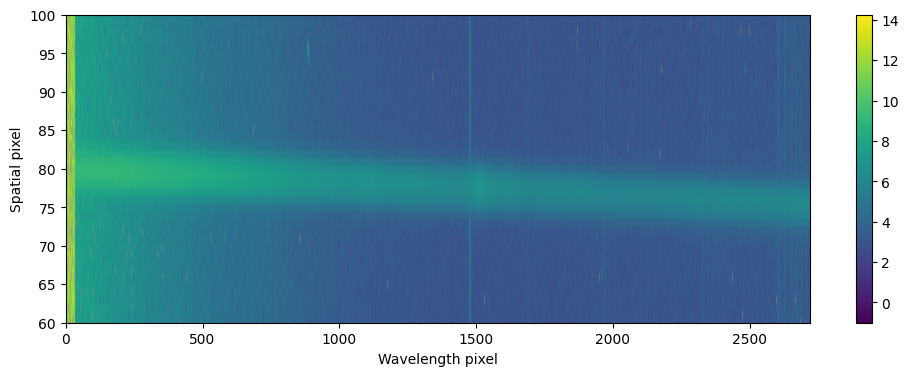

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.imshow(np.log(data), aspect='auto', )
plt.ylim(60, 100)
plt.xlabel('Wavelength pixel')
plt.ylabel('Spatial pixel')
plt.colorbar()

[]

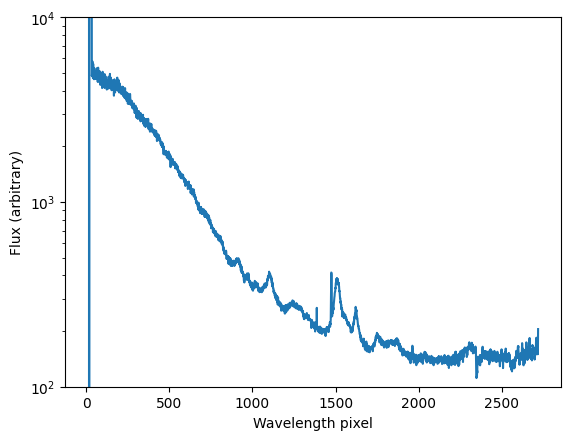

In [ ]:
plt.figure()
plt.plot(data[75:85].mean(0))
plt.xlabel('Wavelength pixel')
plt.ylabel('Flux (arbitrary)')
plt.ylim(1e2, 1e4)
plt.semilogy()